# Debasement of silver coins during the late Byzantine Empire

## 1. Purpose

Perform an hypothesis on the silver content in coins during different periods of the Byzantine empire.

## 2. Setup the notebook

### 2.1 Import the modules

In [1]:
from scipy.stats import probplot, t, ttest_ind
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Set visaulisation theme

In [2]:
sns.set_theme()

### 2.3 Load the data

In [3]:
coins = pd.read_csv("..\\data\\coins.csv")

## 3. Explore the data

### 3.1 Preview the data

In [4]:
coins.head()

,Coin1,Coin2,Coin3,Coin4
0,5.9,6.9,4.9,5.3
1,6.8,9.0,5.5,5.6
2,6.4,6.6,4.6,5.5
3,7.0,8.1,4.5,5.1
4,6.6,9.3,NaN,6.2


### 3.2 Describe the data

In [5]:
coins.describe().T

,count,mean,std,min,25%,50%,75%,max
Coin1,9.0,6.744444,0.543395,5.9,6.400,6.80,7.00,7.7
Coin2,7.0,8.242857,1.099784,6.6,7.500,8.60,9.10,9.3
Coin3,4.0,4.875000,0.450000,4.5,4.575,4.75,5.05,5.5
Coin4,7.0,5.614286,0.362531,5.1,5.400,5.60,5.80,6.2


### 3.3 Plot the data

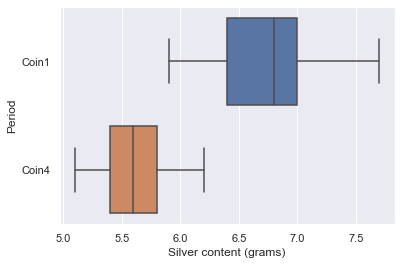

In [6]:
ax = sns.boxplot(
    data=coins[["Coin1", "Coin4"]].melt(),
    x="value",
    y="variable")
ax.set(xlabel="Silver content (grams)", ylabel="Period")
plt.show()

## 4. Check the assumptions of normality

### 4.1 Probability plots

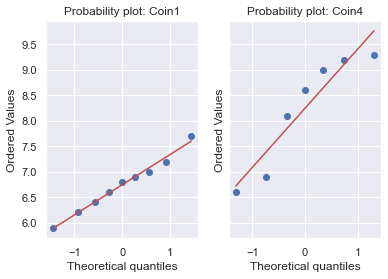

In [7]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
probplot(x=coins["Coin1"], plot=ax1)
probplot(x=coins["Coin2"].dropna(), plot=ax2)
ax1.set(title="Probability plot: Coin1")
ax2.set(title="Probability plot: Coin4")
plt.show()

### 4.2 Test common variance

In [8]:
if coins["Coin1"].var() > coins["Coin4"].var():
    print(coins["Coin1"].var()/coins["Coin4"].var() < 3)
else:
    print(coins["Coin4"].var()/coins["Coin1"].var() < 3)

True


## 5. Perform hypothesis test

In [9]:
ttest_ind(
    a=coins["Coin1"],
    b=coins["Coin4"],
    nan_policy="omit",
    alternative="two-sided")

Ttest_indResult(statistic=4.7271976883653455, pvalue=0.00032409788275889563)